In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

Loading the dataset using Pandas

In [264]:
data = pd.read_csv("train.csv")

# viewing the first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [265]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [267]:
data['MSSubClass'] = data['MSSubClass'].astype('object')

In [268]:
data.dtypes.value_counts()

object     44
int64      34
float64     3
Name: count, dtype: int64

Checking for Null Values

In [269]:
null_cols = data.columns[(data.isna().sum() > 0).values]
null_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [270]:
for col in null_cols:
    if data[col].dtype == "object" or col == 'GarageYrBlt':     # GarageYrBlt is a categorical variable
        # categorical variables are supposed to be filled with Mode, since we do not have any other appropriate value with us
        data.fillna({col:data[col].mode()[0]}, inplace=True)
    else:
        # continuous variables are supposed to be filled with mean, since we do not have any other appropriate value with us
        data.fillna({col:data[col].median()}, inplace=True)

In [271]:
data.isna().sum().sum()
# all null values were handelled

0

Checking Duplicates

In [272]:
data.duplicated().sum()
# no duplicates

0

Outlier Detection

In [273]:
def detect_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    h = q3 + 1.5 * iqr
    l = q1 - 1.5 * iqr

    return col.map(lambda x: True if x > h or x < l else False).values

def fix_outliers(col):
    outliers = detect_outliers(data[col])
    if outliers.sum() > 0:
        print(f"Outliers fixed for {col}")
    
    data.loc[outliers, col] = data[col].median()


for col in data.select_dtypes(exclude='object').columns:
    fix_outliers(col)

Outliers fixed for LotFrontage
Outliers fixed for LotArea
Outliers fixed for OverallQual
Outliers fixed for OverallCond
Outliers fixed for YearBuilt
Outliers fixed for MasVnrArea
Outliers fixed for BsmtFinSF1
Outliers fixed for BsmtFinSF2
Outliers fixed for BsmtUnfSF
Outliers fixed for TotalBsmtSF
Outliers fixed for 1stFlrSF
Outliers fixed for 2ndFlrSF
Outliers fixed for LowQualFinSF
Outliers fixed for GrLivArea
Outliers fixed for BsmtFullBath
Outliers fixed for BsmtHalfBath
Outliers fixed for BedroomAbvGr
Outliers fixed for KitchenAbvGr
Outliers fixed for TotRmsAbvGrd
Outliers fixed for Fireplaces
Outliers fixed for GarageYrBlt
Outliers fixed for GarageCars
Outliers fixed for GarageArea
Outliers fixed for WoodDeckSF
Outliers fixed for OpenPorchSF
Outliers fixed for EnclosedPorch
Outliers fixed for 3SsnPorch
Outliers fixed for ScreenPorch
Outliers fixed for PoolArea
Outliers fixed for MiscVal
Outliers fixed for SalePrice


In [274]:
data.drop("Id", axis=1, inplace=True)

In [275]:
data.duplicated().sum()

0

In [276]:
for col in data:
    if data[col].nunique() == 1:
        data.drop(col, axis=1, inplace=True)
        print(f"{col} was dropped")
# these are variables which are holding just one value

BsmtFinSF2 was dropped
LowQualFinSF was dropped
BsmtHalfBath was dropped
KitchenAbvGr was dropped
EnclosedPorch was dropped
3SsnPorch was dropped
ScreenPorch was dropped
PoolArea was dropped
MiscVal was dropped


# EDA

In [277]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,61,Gd,MnPrv,Shed,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,298,0,Gd,MnPrv,Shed,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,42,Gd,MnPrv,Shed,9,2008,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,35,Gd,MnPrv,Shed,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,192,84,Gd,MnPrv,Shed,12,2008,WD,Normal,250000


In [278]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'M

<Axes: xlabel='SalePrice', ylabel='Count'>

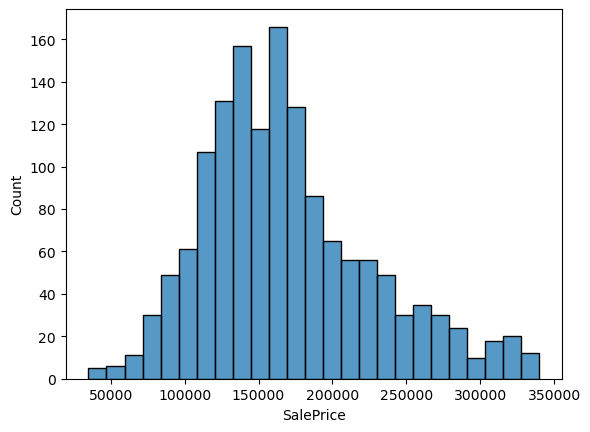

In [279]:
sns.histplot(data['SalePrice'])

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

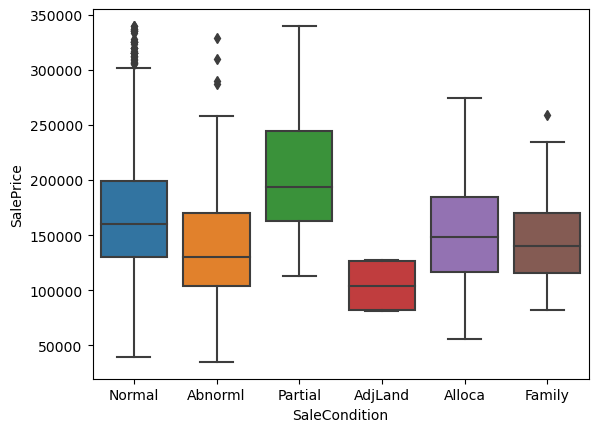

In [280]:
sns.boxplot(data=data, x='SaleCondition', y='SalePrice')

Here we can observe ranges of Sale Price of Property with respect to Sale Condition 

Partial Sale Condition has a higher Price Bracket

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

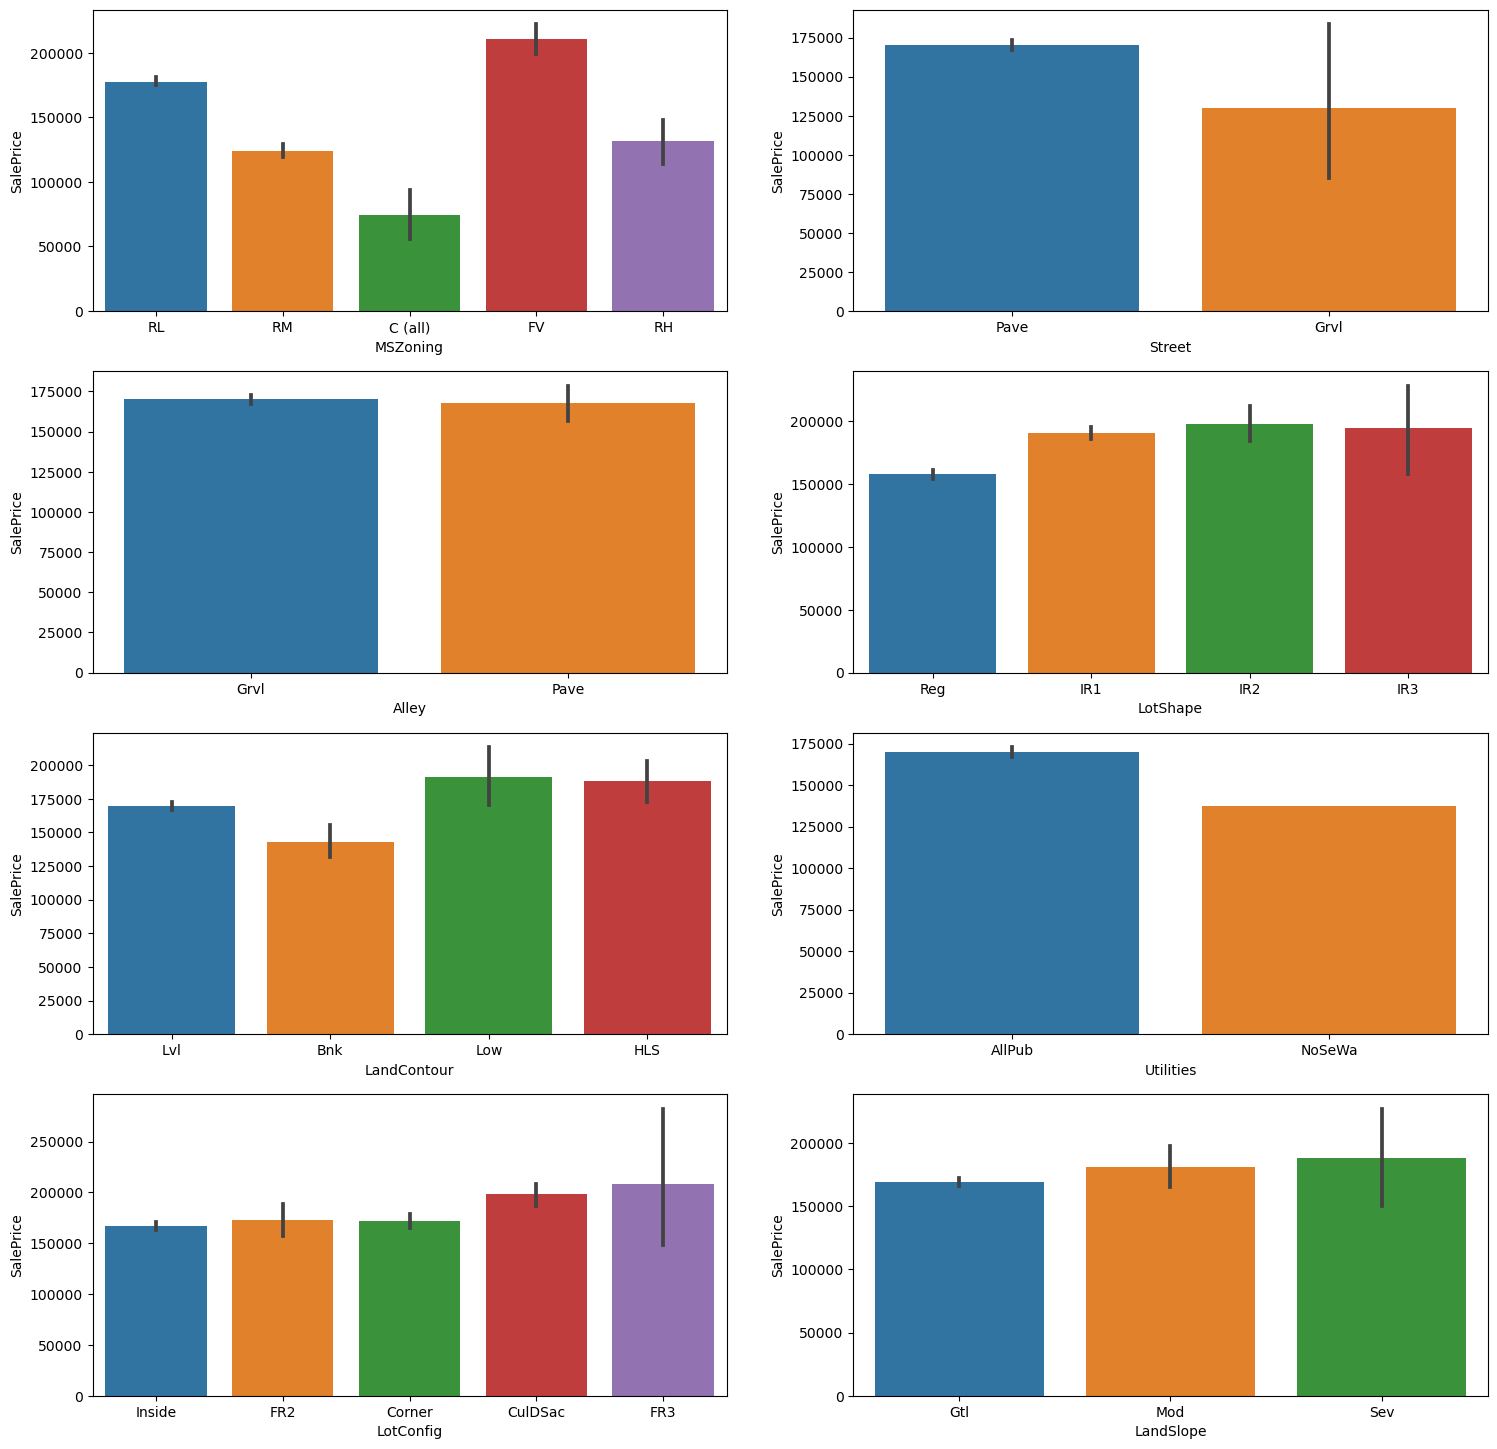

In [281]:
# MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, 

plt.figure(figsize=(18, 18))

plt.subplot(4, 2, 1)
sns.barplot(data = data, x = 'MSZoning', y = 'SalePrice')
plt.subplot(4, 2, 2)
sns.barplot(data = data, x = 'Street', y = 'SalePrice')
plt.subplot(4, 2, 3)
sns.barplot(data = data, x = 'Alley', y = 'SalePrice')
plt.subplot(4, 2, 4)
sns.barplot(data = data, x = 'LotShape', y = 'SalePrice')
plt.subplot(4, 2, 5)
sns.barplot(data = data, x = 'LandContour', y = 'SalePrice')
plt.subplot(4, 2, 6)
sns.barplot(data = data, x = 'Utilities', y = 'SalePrice')
plt.subplot(4, 2, 7)
sns.barplot(data = data, x = 'LotConfig', y = 'SalePrice')
plt.subplot(4, 2, 8)
sns.barplot(data = data, x = 'LandSlope', y = 'SalePrice')

In [282]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

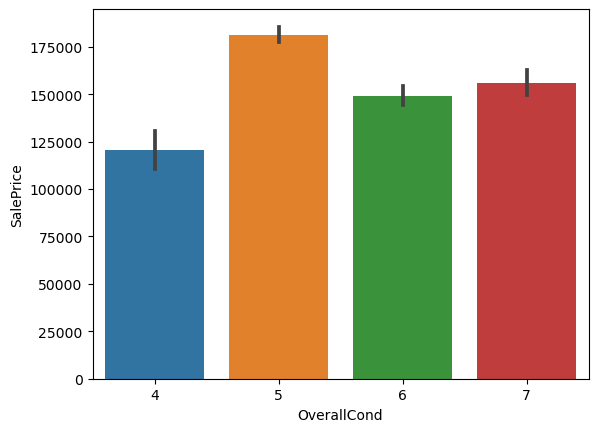

In [283]:
sns.barplot(data = data, x = 'OverallCond', y = 'SalePrice')

<Axes: >

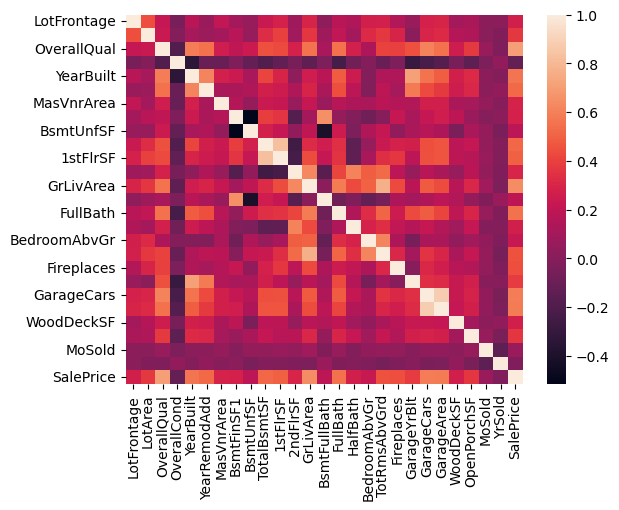

In [284]:
corr = data.select_dtypes(exclude='object').corr()
sns.heatmap(corr)

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

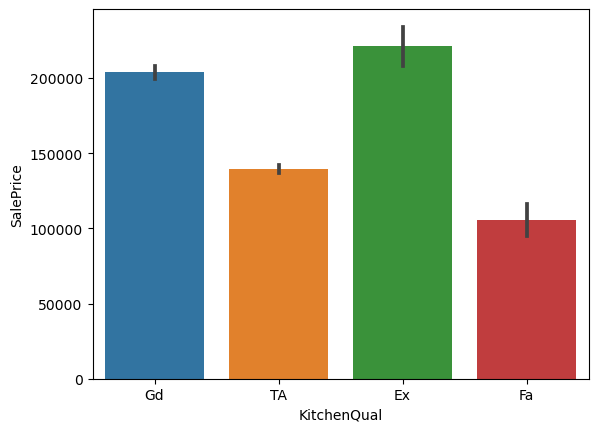

In [285]:
sns.barplot(data = data, x = 'KitchenQual', y ='SalePrice')

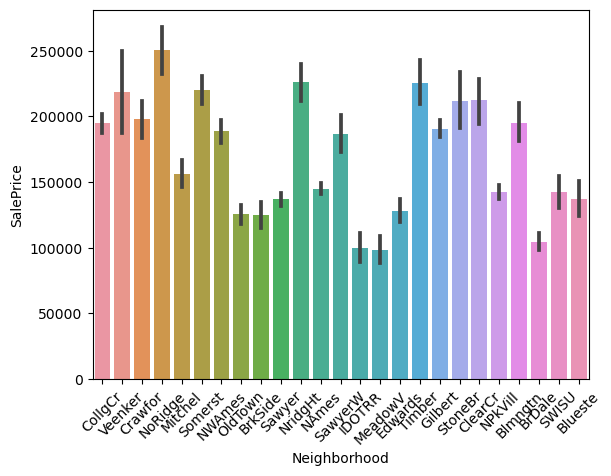

In [286]:
sns.barplot(data = data, x = 'Neighborhood', y ='SalePrice')
plt.xticks(rotation=45)
plt.show()

# Data Preparation before model building

In [287]:
cat_col = data.select_dtypes('object').columns
num_col = data.select_dtypes(exclude='object').columns

Converting the categorical variables to numerical using one-hot-encoding or label encoding

In [291]:
# label-encoding for ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, CentralAir, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC
# one-hot encoding for rest

label_encoding = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC'
]

le = LabelEncoder()
one_hot_cols = []
encoded_data = data.copy()

for col in cat_col:
    if col in label_encoding:
        encoded_data[col] = le.fit_transform(data[col])
    else:
        one_hot_cols.append(col)


In [292]:
encoded_data = encoded_data.join(pd.get_dummies(encoded_data[one_hot_cols]))
encoded_data.drop(one_hot_cols, axis=1, inplace=True)

In [293]:
encoded_data.dtypes.value_counts()

bool       205
int64       20
int32       14
float64      7
Name: count, dtype: int64

In [409]:
ss = StandardScaler()
X = ss.fit_transform(encoded_data.drop('SalePrice', axis=1))
y = data['SalePrice']

In [410]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15*len(X)/len(X_train_val))

In [411]:
len(X_train), len(X_test)

(1186, 292)

Linear Regression Model

In [412]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

print(f"R2 Score of {r2_score(y_val, lr.predict(X_val))}")

R2 Score of -4.8989726612839766e+23


Linear Regression Model with R2 Score of -6.120115593947864e+24

In [413]:
feature_names = encoded_data.drop('SalePrice', axis=1).columns
top = 5
features_with_good_influence_on_price = sorted({idx: coef for idx, coef in enumerate(lr.coef_)}.items(), key = lambda x: x[1], reverse=True)[:top]
features_with_good_influence_on_price = {feature_names[idx]: value for idx, value in features_with_good_influence_on_price}
features_with_good_influence_on_price

{'GarageType_Attchd': 3.2643715388236868e+16,
 'GarageType_Detchd': 3.0234707854858696e+16,
 'RoofStyle_Gable': 2.2651334891026416e+16,
 'LandSlope_Gtl': 2.205666982106055e+16,
 'RoofStyle_Hip': 2.1755682005712764e+16}

Top 5 features: (Price is heavily affected if - )
1. Garage is attached from home
2. Garage is detached from home
3. Roof Style is Gable
4. Landslope is Gentle
5. Roofstyle is Hip

Lasso Regression

In [414]:
r2_max = 0
better_alpha = 0.2
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    lasso = Lasso(alpha=alpha, max_iter=3000)
    lasso.fit(X_train, y_train)
    r2 = r2_score(y_val, lasso.predict(X_val))
    if r2 > r2_max:
        r2_max = r2
        better_alpha = alpha
print(f"R2 Score of {r2_max} for alpha value {better_alpha}")

c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.259e+10, tolerance: 3.911e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.268e+10, tolerance: 3.911e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.277e+10, toleranc

R2 Score of 0.7594097862976842 for alpha value 0.8


c:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.715e+09, tolerance: 3.911e+08
  model = cd_fast.enet_coordinate_descent(


Best alpha value for Lasso Linear Regression is 0.1 with R2 Score of 0.7594097862976842

In [415]:
r2_max = 0
better_alpha = 0.2
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge.score(X_val, y_val)
    r2 = r2_score(y_val, ridge.predict(X_val))
    if r2 > r2_max:
        r2_max = r2
        better_alpha = alpha

print(f"R2 Score of {r2_max} for alpha value {better_alpha}")

R2 Score of 0.7594705205747283 for alpha value 0.8


Best alpha value for Ridge Linear Regression is 0.8 with R2 Score of 0.7594705205747283

# Best Model

In [418]:
ridge_model = Ridge(alpha=0.8)
ridge_model.fit(X_train, y_train)

r2_score(y_test, ridge_model.predict(X_test))

0.8216943166950745

Best Model is Ridge Linear Regression with alpha 0.8 and R2 Score 0.822

# If the top 5 contributing features are removed then:

In [416]:
experimental_data = encoded_data.drop(['GarageType_Attchd', 'GarageType_Detchd', 'RoofStyle_Gable', 'LandSlope_Gtl', 'RoofStyle_Hip'], axis=1)

ss = StandardScaler()
new_X = ss.fit_transform(experimental_data.drop('SalePrice', axis=1))
new_y = data['SalePrice']

exp_X_train_val, exp_X_test, exp_y_train_val, exp_y_test = train_test_split(new_X, new_y, test_size=0.2)
exp_X_train, exp_X_val, exp_y_train, exp_y_val = train_test_split(new_X, new_y, test_size=0.15*len(new_X)/len(exp_X_train_val))

lr = LinearRegression()
lr.fit(exp_X_train, exp_y_train)
lr.score(exp_X_test, exp_y_test)

feature_names = experimental_data.drop('SalePrice', axis=1).columns
top = 5
features_with_good_influence_on_price = sorted({idx: coef for idx, coef in enumerate(lr.coef_)}.items(), key = lambda x: x[1], reverse=True)[:top]
features_with_good_influence_on_price = {feature_names[idx]: value for idx, value in features_with_good_influence_on_price}
features_with_good_influence_on_price

{'BldgType_2fmCon': 3.625303545181276e+16,
 'MiscFeature_Shed': 3.2811658143707828e+16,
 'BldgType_1Fam': 2.8104290693243892e+16,
 'Foundation_PConc': 2.7018667458806244e+16,
 'Foundation_CBlock': 2.6958837789695576e+16}

Top 5 features: (Price is heavily affected if - )
1. If building type is Two-family Conversion; originally built as one-family dwelling
2. Property has Shed (over 100 SF)
3. If building type is Single-family detached
4. If building foundation is Poured concrete
5. If building foundation is Cinder Block 